In [ ]:
#importing the basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings ('ignore')
import re

#Data Reading

In [ ]:
#data reading
order_report = pd.read_excel('/content/drive/MyDrive/datasets/Company X - Order Report.xlsx')
pincode = pd.read_excel('/content/drive/MyDrive/datasets/Company X - Pincode Zones.xlsx')
sku = pd.read_excel('/content/drive/MyDrive/datasets/Company X - SKU Master.xlsx')
invoice = pd.read_excel('/content/drive/MyDrive/datasets/Courier Company - Invoice.xlsx')
courier_com = pd.read_excel('/content/drive/MyDrive/datasets/Courier Company - Rates.xlsx')

In [ ]:
order_report.head(2)

,ExternOrderNo,SKU,Order Qty
0,2001827036,8904223818706,1.0
1,2001827036,8904223819093,1.0


In [ ]:
pincode.head(2)

,Warehouse Pincode,Customer Pincode,Zone
0,121003,507101,d
1,121003,486886,d


In [ ]:
sku.head(2)

,SKU,Weight (g)
0,8904223815682,210
1,8904223815859,165


In [ ]:
invoice.head(2)

,AWB Code,Order ID,Charged Weight,Warehouse Pincode,Customer Pincode,Zone,Type of Shipment,Billing Amount (Rs.)
0,1091117222124,2001806232,1.3,121003,507101,d,Forward charges,135.0
1,1091117222194,2001806273,1.0,121003,486886,d,Forward charges,90.2


In [ ]:
courier_com.head()

,Zone,Weight Slabs,Forward Fixed Charge,Forward Additional Weight Slab Charge,RTO Fixed Charge,RTO Additional Weight Slab Charge
0,A,0.50,29.5,23.6,13.6,23.6
1,B,1.00,33.0,28.3,20.5,28.3
2,C,1.25,40.1,38.9,31.9,38.9
3,D,1.50,45.4,44.8,41.3,44.8
4,E,2.00,56.6,55.5,50.7,55.5


In [ ]:
#checking the common column in dataframe make a single table
print("order_report : ",'\n',order_report.columns)
print( )
print('pincode : ','\n', pincode.columns)
print( )
print('sku : ','\n',sku.columns)
print( )
print('invoice : ','\n',invoice.columns)
print( )
print('courier_com : ','\n',courier_com.columns)

order_report :  
 Index(['ExternOrderNo', 'SKU', 'Order Qty'], dtype='object')

pincode :  
 Index(['Warehouse Pincode', 'Customer Pincode', 'Zone'], dtype='object')

sku :  
 Index(['SKU', 'Weight (g)'], dtype='object')

invoice :  
 Index(['AWB Code', 'Order ID', 'Charged Weight', 'Warehouse Pincode',
       'Customer Pincode', 'Zone', 'Type of Shipment', 'Billing Amount (Rs.)'],
      dtype='object')

courier_com :  
 Index(['Zone', 'Weight Slabs', 'Forward Fixed Charge',
       'Forward Additional Weight Slab Charge', 'RTO Fixed Charge',
       'RTO Additional Weight Slab Charge'],
      dtype='object')


In [ ]:
#checking the shape of each dataframe
print("The number of rowns in order_report is  ",order_report.shape[0], "and the nummber of columns is", order_report.shape[1])
print()
print("The number of rowns in pincode  ", pincode.shape[0] ,"and the nummber of columns is" ,pincode.shape[1])
print()
print("The number of rowns in sku",sku.shape[0],"and the nummber of columns is",sku.shape[1])
print()
print("The number of rowns in invoice ",invoice.shape[0],"and the nummber of columns is",invoice.shape[1])
print()
print("The number of rowns in courier_com  ",courier_com.shape[0],"and the nummber of columns is",courier_com.shape[1])

The number of rowns in order_report is   400 and the nummber of columns is 3

The number of rowns in pincode   124 and the nummber of columns is 3

The number of rowns in sku 66 and the nummber of columns is 2

The number of rowns in invoice  124 and the nummber of columns is 8

The number of rowns in courier_com   5 and the nummber of columns is 6


#cheking the unique values in each column

In [ ]:
order_report.nunique()

ExternOrderNo    124
SKU               65
Order Qty          6
dtype: int64

In [ ]:
sku.nunique()

SKU           65
Weight (g)    31
dtype: int64

In [ ]:
pincode.nunique()

Warehouse Pincode      1
Customer Pincode     108
Zone                   3
dtype: int64

#duplicates check

In [ ]:
print('duplicates present in order_report table :', order_report.duplicated().sum())
print('duplicates present in pincode table :' ,pincode.duplicated().sum())
print('duplicates present in sku table :' ,sku.duplicated().sum())
print('duplicates present in invoice table :' ,invoice.duplicated().sum())
print('duplicates present in courier_com table :' ,courier_com.duplicated().sum())

duplicates present in order_report table : 2
duplicates present in pincode table : 16
duplicates present in sku table : 1
duplicates present in invoice table : 0
duplicates present in courier_com table : 0


In [ ]:
#merging the order_report and sku table on the basis of sku after removing the duplicates
order_sku = pd.merge(order_report[order_report.duplicated() == False],
                      sku[sku.duplicated() ==False],on = 'SKU')
print(order_sku)

     ExternOrderNo            SKU  Order Qty  Weight (g)
0       2001827036  8904223818706        1.0         127
1       2001821995  8904223818706        1.0         127
2       2001819252  8904223818706        1.0         127
3       2001816996  8904223818706        1.0         127
4       2001814580  8904223818706        1.0         127
..             ...            ...        ...         ...
393     2001806616  8904223819123        1.0         250
394     2001806567  8904223815804        1.0         160
395     2001806567  8904223818577        1.0         150
396     2001806408  8904223819437        2.0         552
397     2001806232  8904223818645        6.0         137

[398 rows x 4 columns]


In [ ]:
#calculating the total weight
order_sku['weight_X(KG)']=order_sku['Order Qty'] * order_sku['Weight (g)']/1000
order_sku.head()

,ExternOrderNo,SKU,Order Qty,Weight (g),weight_X(KG)
0,2001827036,8904223818706,1.0,127,0.127
1,2001821995,8904223818706,1.0,127,0.127
2,2001819252,8904223818706,1.0,127,0.127
3,2001816996,8904223818706,1.0,127,0.127
4,2001814580,8904223818706,1.0,127,0.127


In [ ]:
#grouping the ExternOrderNo to impute the missing values
order_total_sku = pd.DataFrame(order_sku.groupby(['ExternOrderNo'])['weight_X(KG)'].sum())
order_total_sku.shape

(124, 1)

In [ ]:
#merging the invoice table with left and right join
order_sku_inv = pd.merge(invoice,order_total_sku,left_on ='Order ID',right_on = 'ExternOrderNo',how = 'inner')
order_sku_inv.head()

,AWB Code,Order ID,Charged Weight,Warehouse Pincode,Customer Pincode,Zone,Type of Shipment,Billing Amount (Rs.),weight_X(KG)
0,1091117222124,2001806232,1.30,121003,507101,d,Forward charges,135.0,1.302
1,1091117222194,2001806273,1.00,121003,486886,d,Forward charges,90.2,0.615
2,1091117222931,2001806408,2.50,121003,532484,d,Forward charges,224.6,2.265
3,1091117223244,2001806458,1.00,121003,143001,b,Forward charges,61.3,0.700
4,1091117229345,2001807012,0.15,121003,515591,d,Forward charges,45.4,0.240


In [ ]:
order_sku_inv.shape

(124, 9)

In [ ]:
#merging the pincode
pincode = pincode[pincode.duplicated() == False]
order_sku_inv_pin = pd.merge(order_sku_inv,pincode,on = ['Warehouse Pincode','Customer Pincode'])
order_sku_inv_pin.head(5)

,AWB Code,Order ID,Charged Weight,Warehouse Pincode,Customer Pincode,Zone_x,Type of Shipment,Billing Amount (Rs.),weight_X(KG),Zone_y
0,1091117222124,2001806232,1.30,121003,507101,d,Forward charges,135.0,1.302,d
1,1091117222194,2001806273,1.00,121003,486886,d,Forward charges,90.2,0.615,d
2,1091117222931,2001806408,2.50,121003,532484,d,Forward charges,224.6,2.265,d
3,1091117223244,2001806458,1.00,121003,143001,b,Forward charges,61.3,0.700,b
4,1091117229345,2001807012,0.15,121003,515591,d,Forward charges,45.4,0.240,d


In [ ]:
#Renaming the columns
order_sku_inv_pin.rename(columns = {'Charged Weight':'weight(Courier(kg))','Zone_x':'Zone(courier)','Zone_y':'Zone(X)','Billing Amount (Rs.)':'Bill(courier)'},
                         inplace = True)

In [ ]:
#creating a copy of datafram
df = order_sku_inv_pin
df.head()


,AWB Code,Order ID,weight(Courier(kg)),Warehouse Pincode,Customer Pincode,Zone(courier),Type of Shipment,Bill(courier),weight_X(KG),Zone(X)
0,1091117222124,2001806232,1.30,121003,507101,d,Forward charges,135.0,1.302,d
1,1091117222194,2001806273,1.00,121003,486886,d,Forward charges,90.2,0.615,d
2,1091117222931,2001806408,2.50,121003,532484,d,Forward charges,224.6,2.265,d
3,1091117223244,2001806458,1.00,121003,143001,b,Forward charges,61.3,0.700,b
4,1091117229345,2001807012,0.15,121003,515591,d,Forward charges,45.4,0.240,d


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124 entries, 0 to 123
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AWB Code             124 non-null    int64  
 1   Order ID             124 non-null    int64  
 2   weight(Courier(kg))  124 non-null    float64
 3   Warehouse Pincode    124 non-null    int64  
 4   Customer Pincode     124 non-null    int64  
 5   Zone(courier)        124 non-null    object 
 6   Type of Shipment     124 non-null    object 
 7   Bill(courier)        124 non-null    float64
 8   weight_X(KG)         124 non-null    float64
 9   Zone(X)              124 non-null    object 
dtypes: float64(3), int64(4), object(3)
memory usage: 10.7+ KB


In [ ]:
#function to assigning the slab
def weight_slab(weight):
    i=round(weight%1,1)
    if i==0.0:
        return weight
    elif i>0.5:
        return int(weight)+1.0
    else:
        return int(weight)+0.5

In [ ]:
#Generation of Weight Slab
df['Weight_slab_X(KG)']=df['weight_X(KG)'].apply(weight_slab)
courier_com['Weight_slab_courier(KG)']=(df['weight(Courier(kg))']).apply(weight_slab)

In [ ]:
df.head(5)

,AWB Code,Order ID,weight(Courier(kg)),Warehouse Pincode,Customer Pincode,Zone(courier),Type of Shipment,Bill(courier),weight_X(KG),Zone(X),Weight_slab_X(KG)
0,1091117222124,2001806232,1.30,121003,507101,d,Forward charges,135.0,1.302,d,1.5
1,1091117222194,2001806273,1.00,121003,486886,d,Forward charges,90.2,0.615,d,1.0
2,1091117222931,2001806408,2.50,121003,532484,d,Forward charges,224.6,2.265,d,2.5
3,1091117223244,2001806458,1.00,121003,143001,b,Forward charges,61.3,0.700,b,1.0
4,1091117229345,2001807012,0.15,121003,515591,d,Forward charges,45.4,0.240,d,0.5


In [ ]:
courier_com.columns

Index(['Zone', 'Weight Slabs', 'Forward Fixed Charge',
       'Forward Additional Weight Slab Charge', 'RTO Fixed Charge',
       'RTO Additional Weight Slab Charge', 'Weight_slab_courier(KG)'],
      dtype='object')

#checking unique values

In [ ]:
print("Zone(courier) :",df['Zone(courier)'].unique())
print()
print("Zone(X) :",df['Zone(X)'].unique())
print()
print("Type of Shipment :",df['Type of Shipment'].unique())
print()
print('types of shipment count','\n', df['Type of Shipment'].value_counts())


Zone(courier) : ['d' 'b' 'e']

Zone(X) : ['d' 'b' 'e']

Type of Shipment : ['Forward charges' 'Forward and RTO charges']

types of shipment count 
 Forward charges            109
Forward and RTO charges     15
Name: Type of Shipment, dtype: int64


In [ ]:
df['Weight_slab_X(KG)'].unique()

array([1.5  , 1.   , 2.5  , 0.5  , 2.   , 1.032, 2.016, 1.048, 3.5  ,
       3.   ])

In [ ]:
#as we can see only 3unique values in zone, creating three diffrent datasets for price calculation
courier_b = courier_com.loc[courier_com.Zone == 'B']
courier_d = courier_com.loc[courier_com.Zone == 'D']
courier_e = courier_com.loc[courier_com.Zone == 'E']

#creating loop for ecpected price calculation

In [ ]:
expected_price = []
for i in range(len(df)):

  if df['Type of Shipment'].iloc[i] == 'Forward charges':

    if df['Zone(X)'].iloc[i] == 'b':
      if df['Weight_slab_X(KG)'][i] <=0.5:
        expected_price.append(courier_b['Forward Fixed Charge'])
      else:
        expected_price.append(((df['Weight_slab_X(KG)'][i]-0.5) * 2 * (courier_b['Forward Fixed Charge'])+(courier_b['Forward Additional Weight Slab Charge'])))

    elif df['Zone(X)'].iloc[i] == 'd':
      if df['Weight_slab_X(KG)'][i] <=0.5:
        expected_price.append(courier_d['Forward Fixed Charge'])
      else:
        expected_price.append(((df['Weight_slab_X(KG)'][i]-0.5) * 2 * (courier_d['Forward Fixed Charge'])+(courier_d['Forward Additional Weight Slab Charge'])))

    elif df['Zone(X)'].iloc[i] == 'e':
      if df['Weight_slab_X(KG)'][i] <=0.5:
        expected_price.append(courier_e['Forward Fixed Charge'])
      else:
        expected_price.append(((df['Weight_slab_X(KG)'][i]-0.5) * 2 * (courier_e['Forward Fixed Charge'])+(courier_e['Forward Additional Weight Slab Charge'])))



  elif df['Type of Shipment'].iloc[i] == 'Forward and RTO charges':
    if df['Zone(X)'].iloc[i] == 'b':
      if df['Weight_slab_X(KG)'][i] <=0.5:
        expected_price.append((courier_b['Forward Fixed Charge'])+(courier_b['RTO Fixed Charge'])	)
      else:
        expected_price.append(((df['Weight_slab_X(KG)'][i]-0.5) * 2 *(courier_b['Forward Fixed Charge'])+(courier_b['RTO Fixed Charge'])) + ((courier_b['Forward Additional Weight Slab Charge'])+(courier_b['RTO Additional Weight Slab Charge'])))

    elif df['Zone(X)'].iloc[i] == 'd':
      if df['Weight_slab_X(KG)'][i] <=0.5:
        expected_price.append((courier_d['Forward Fixed Charge'])+(courier_d['RTO Fixed Charge'])	)
      else:
        expected_price.append(((df['Weight_slab_X(KG)'][i]-0.5) * 2 *(courier_d['Forward Fixed Charge'])+(courier_d['RTO Fixed Charge'])) + ((courier_d['Forward Additional Weight Slab Charge'])+(courier_d['RTO Additional Weight Slab Charge'])))

    elif df['Zone(X)'].iloc[i] == 'e':
      if df['Weight_slab_X(KG)'][i] <=0.5:
        expected_price.append((courier_e['Forward Fixed Charge'])+(courier_e['RTO Fixed Charge'])	)
      else:
        expected_price.append(((df['Weight_slab_X(KG)'][i]-0.5) * 2 *(courier_e['Forward Fixed Charge'])+(courier_e['RTO Fixed Charge'])) + ((courier_e['Forward Additional Weight Slab Charge'])+(courier_e['RTO Additional Weight Slab Charge'])))

print(expected_price)

[3    135.6
dtype: float64, 3    90.2
dtype: float64, 3    226.4
dtype: float64, 1    61.3
dtype: float64, 3    45.4
Name: Forward Fixed Charge, dtype: float64, 3    45.4
Name: Forward Fixed Charge, dtype: float64, 1    33.0
Name: Forward Fixed Charge, dtype: float64, 1    94.3
dtype: float64, 1    33.0
Name: Forward Fixed Charge, dtype: float64, 3    45.4
Name: Forward Fixed Charge, dtype: float64, 3    45.4
Name: Forward Fixed Charge, dtype: float64, 1    61.3
dtype: float64, 3    90.2
dtype: float64, 1    94.3
dtype: float64, 3    90.2
dtype: float64, 3    45.4
Name: Forward Fixed Charge, dtype: float64, 3    135.6
dtype: float64, 3    90.2
dtype: float64, 4    107.3
dtype: float64, 1    61.3
dtype: float64, 3    90.2
dtype: float64, 1    94.3
dtype: float64, 3    176.3
dtype: float64, 1    110.1
dtype: float64, 3    176.3
dtype: float64, 3    176.3
dtype: float64, 4    218.3
dtype: float64, 3    221.7
dtype: float64, 1    143.1
dtype: float64, 3    176.3
dtype: float64, 3    267.1


#fetching the price from the ecpected price list

In [ ]:
#creating loop using regular expression to fetch the values
expected = pd.Series([expected_price])
last_values = []
for line in expected:
  line = str(line)
  numbers = re.findall(r'\b\d+\.\d+\b',line)




In [ ]:
print(numbers)

['135.6', '90.2', '226.4', '61.3', '45.4', '45.4', '33.0', '94.3', '33.0', '45.4', '45.4', '61.3', '90.2', '94.3', '90.2', '45.4', '135.6', '90.2', '107.3', '61.3', '90.2', '94.3', '176.3', '110.1', '176.3', '176.3', '218.3', '221.7', '143.1', '176.3', '267.1', '179.2056', '176.3', '33.0', '45.4', '45.4', '33.0', '45.4', '45.4', '45.4', '45.4', '33.0', '90.2', '33.0', '33.0', '61.3', '45.4', '90.2', '45.4', '45.4', '61.3', '45.4', '135.6', '45.4', '182.4528', '64.468', '94.3', '135.6', '317.2', '127.3', '61.3', '33.0', '61.3', '33.0', '61.3', '33.0', '61.3', '61.3', '33.0', '33.0', '61.3', '61.3', '53.5', '193.3', '61.3', '160.3', '33.0', '33.0', '53.5', '33.0', '61.3', '33.0', '61.3', '61.3', '33.0', '33.0', '33.0', '61.3', '33.0', '61.3', '94.3', '33.0', '112.1', '112.1', '56.6', '225.3', '61.3', '33.0', '33.0', '33.0', '33.0', '33.0', '33.0', '61.3', '33.0', '61.3', '56.6', '33.0', '33.0', '61.3', '33.0', '33.0', '33.0', '33.0', '33.0', '33.0', '33.0', '33.0', '61.3', '33.0', '61.3'

In [ ]:
#adding column in dataframe
df['expected_price(X)'] = numbers

In [ ]:
df.head()

,AWB Code,Order ID,weight(Courier(kg)),Warehouse Pincode,Customer Pincode,Zone(courier),Type of Shipment,Bill(courier),weight_X(KG),Zone(X),Weight_slab_X(KG),expected_price(X)
0,1091117222124,2001806232,1.30,121003,507101,d,Forward charges,135.0,1.302,d,1.5,135.6
1,1091117222194,2001806273,1.00,121003,486886,d,Forward charges,90.2,0.615,d,1.0,90.2
2,1091117222931,2001806408,2.50,121003,532484,d,Forward charges,224.6,2.265,d,2.5,226.4
3,1091117223244,2001806458,1.00,121003,143001,b,Forward charges,61.3,0.700,b,1.0,61.3
4,1091117229345,2001807012,0.15,121003,515591,d,Forward charges,45.4,0.240,d,0.5,45.4


In [ ]:
df.columns

Index(['AWB Code', 'Order ID', 'weight(Courier(kg))', 'Warehouse Pincode',
       'Customer Pincode', 'Zone(courier)', 'Type of Shipment',
       'Bill(courier)', 'weight_X(KG)', 'Zone(X)', 'Weight_slab_X(KG)',
       'expected_price(X)'],
      dtype='object')

In [ ]:
df = df[['Order ID','AWB Code','weight_X(KG)','Weight_slab_X(KG)','weight(Courier(kg))','Zone(X)','Zone(courier)','expected_price(X)','Bill(courier)']]

In [ ]:
df.head()

,Order ID,AWB Code,weight_X(KG),Weight_slab_X(KG),weight(Courier(kg)),Zone(X),Zone(courier),expected_price(X),Bill(courier)
0,2001806232,1091117222124,1.302,1.5,1.30,d,d,135.6,135.0
1,2001806273,1091117222194,0.615,1.0,1.00,d,d,90.2,90.2
2,2001806408,1091117222931,2.265,2.5,2.50,d,d,226.4,224.6
3,2001806458,1091117223244,0.700,1.0,1.00,b,b,61.3,61.3
4,2001807012,1091117229345,0.240,0.5,0.15,d,d,45.4,45.4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124 entries, 0 to 123
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Order ID             124 non-null    int64  
 1   AWB Code             124 non-null    int64  
 2   weight_X(KG)         124 non-null    float64
 3   Weight_slab_X(KG)    124 non-null    float64
 4   weight(Courier(kg))  124 non-null    float64
 5   Zone(X)              124 non-null    object 
 6   Zone(courier)        124 non-null    object 
 7   expected_price(X)    124 non-null    object 
 8   Bill(courier)        124 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 13.8+ KB


In [ ]:
#chaning the data type
df['expected_price(X)'] = df['expected_price(X)'].astype(float)

In [ ]:
#calculating the difference Between Expected Charges and Billed Charges
df['Difference Between Expected Charges and Billed Charges(Rs.)'] = (df['expected_price(X)']) - (df['Bill(courier)'])

In [ ]:
df.head()

,Order ID,AWB Code,weight_X(KG),Weight_slab_X(KG),weight(Courier(kg)),Zone(X),Zone(courier),expected_price(X),Bill(courier),Difference Between Expected Charges and Billed Charges(Rs.)
0,2001806232,1091117222124,1.302,1.5,1.30,d,d,135.6,135.0,0.6
1,2001806273,1091117222194,0.615,1.0,1.00,d,d,90.2,90.2,0.0
2,2001806408,1091117222931,2.265,2.5,2.50,d,d,226.4,224.6,1.8
3,2001806458,1091117223244,0.700,1.0,1.00,b,b,61.3,61.3,0.0
4,2001807012,1091117229345,0.240,0.5,0.15,d,d,45.4,45.4,0.0


In [ ]:
#some basic calculation for better understanding
expected = (df['expected_price(X)']) - (df['Difference Between Expected Charges and Billed Charges(Rs.)'])
print('Total expected charges :',sum(expected))
paid = (df['Bill(courier)']) - (df['Difference Between Expected Charges and Billed Charges(Rs.)'])
print('Total charges charged by the courier company :',sum(paid))

extra = sum(paid) - sum(expected)
print('extra charges paid :',extra)

Total expected charges : 13648.20000000001
Total charges charged by the courier company : 17920.9736
extra charges paid : 4272.773599999991


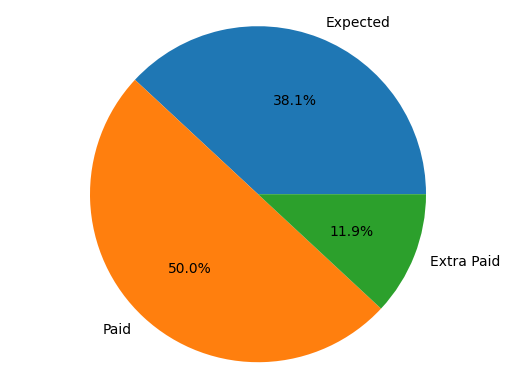

In [ ]:
#visualising the calculations
values = [sum(expected), sum(paid),extra]
label = ['Expected','Paid','Extra Paid']

plt.pie(values,labels = label, autopct = "%1.1f%%")
plt.axis('equal')
plt.show()

In [ ]:
#transorming the table to excel sheet
# write_file = pd.ExcelWriter('Delivery charges analytics.xlsx')
# df.to_excel(write_file , sheet_name = "Delivery charges analytics")
# write_file.save()

In [ ]:
from google.colab import files
df.to_csv('Delivery_charges_analytics.csv', index = False)
files.download('Delivery_charges_analytics.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>